In [1]:
import pyforest

In [2]:
df_path = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/datasets/80train_20test/featurized/'
neks = ['NEK2_binding', 'NEK2_inhibition', 'NEK3_binding', 'NEK5_binding', 'NEK9_binding', 'NEK9_inhibition']
model_types = ['GP', 'RF']
feat_types=['MOE','MFP']
RF_types = ['RF', 'RF_BCW', 'BRFC', 'BRFC_BCW'] 
samplings = ['none_scaled','UNDER','SMOTE']
rf_path = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/results/RF_results/'
gp_path = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/results/GP_results/'
cmpd_df_path = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/results/compound_TNFPFNTP/'
col_order = ['NEK', 'feat_type', 'strategy','modeling_type', 'compound_id', 'active', 'prediction' , 'RF_type']


ideas 
- see overlapping molecules between all test sets
- then see if it's in test/train

In [3]:
all_neks = []
# all_nek_dfs=pd.DataFrame()
for nek in neks: 
    df_orig = pd.read_csv(f'{df_path}{nek}_MFP_none_scaled.csv')
    df_UNDER = pd.read_csv(f'{df_path}{nek}_MFP_UNDER.csv')
    # all_neks.append(df_orig[df_orig['subset']=='test']) 
    # all_neks.append(df_UNDER[df_UNDER['subset']=='test']) 
    
    unique_cmpds = set(df_orig['compound_id']).intersection(set(df_UNDER['compound_id']))
    
    unique_cmpds_nek = df_orig[df_orig['compound_id'].isin(unique_cmpds)]
    unique_cmpds_nek_test=unique_cmpds_nek[unique_cmpds_nek['subset']=='test']
    all_neks.append(unique_cmpds_nek_test)
    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
def common_unique_values(list1, list2, *lists):
    sets = [set(list1), set(list2)]
    for lst in lists:
        sets.append(set(lst))
    return set.intersection(*sets)


In [29]:
all_dfs = [] 
all_neks = []
for nek in neks:  
    full_df = pd.read_csv(f'{df_path}{nek}_MFP_none_scaled.csv') 
    # full_df=full_df[full_df['subset']=='train']
    all_dfs.append(full_df)
    all_neks.append(nek) 
    
df_dict = {}
for df, nek in zip(all_dfs, all_neks):
    df_dict[nek] = df


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
neks = ['NEK2_binding', 'NEK2_inhibition', 'NEK3_binding', 'NEK5_binding', 'NEK9_binding', 'NEK9_inhibition']
NEK2_binding=df_dict['NEK2_binding']
NEK2_inhibition=df_dict['NEK2_inhibition']  
NEK3_binding=df_dict['NEK3_binding']
NEK5_binding=df_dict['NEK5_binding']
NEK9_binding=df_dict['NEK9_binding']
NEK9_inhibition=df_dict['NEK9_inhibition']   

In [31]:
nek2inhibtest=NEK2_inhibition[NEK2_inhibition['subset']=='test']
nek9inhibtest=NEK9_inhibition[NEK9_inhibition['subset']=='test']
common_inhib_test=common_unique_values(list(nek2inhibtest['compound_id'].values),list(nek9inhibtest['compound_id'].values))
common_inhib_test

{'kdb_2013',
 'kdb_2212',
 'kdb_2238',
 'kdb_2908',
 'kdb_3160',
 'kdb_3164',
 'kdb_3211',
 'kdb_3224',
 'kdb_3232',
 'kdb_3241',
 'kdb_3264',
 'kdb_3290',
 'kdb_3305',
 'kdb_3330',
 'kdb_3334'}

In [64]:
nek2bindtest=NEK2_binding[NEK2_binding['subset']=='test']
nek9bindtest=NEK9_binding[NEK9_binding['subset']=='test']
nek3bindtest=NEK3_binding[NEK3_binding['subset']=='test']
nek5bindtest=NEK5_binding[NEK5_binding['subset']=='test']
common_binding_test = common_unique_values(list(nek2bindtest['compound_id'].values),list(nek9bindtest['compound_id'].values),
                           list(nek3bindtest['compound_id'].values),list(nek5bindtest['compound_id'].values)     )
common_binding_test

{'kdb_2181'}

In [57]:
nek9_inhib_selects=[]
nek2_inhib_selects=[]

for cmpd in common_inhib_test:
    for nek_df in [NEK2_inhibition, NEK9_inhibition]: 
        nek_val = nek_df['NEK'].values[0]
        match = nek_df[nek_df['compound_id'] == cmpd][['compound_id','active']]
        # print(match)
        if nek_val == 'NEK2_inhibition':
            nek2_inhib_selects.append(match)
        elif nek_val == 'NEK9_inhibition':
            nek9_inhib_selects.append(match)


In [68]:
nek9inhib_df = pd.concat(nek9_inhib_selects).reset_index(drop=True)
nek2inhib_df = pd.concat(nek2_inhib_selects).reset_index(drop=True)
inhibition_selectivity = pd.merge(nek2inhib_df,nek9inhib_df, on='compound_id',
                        how='outer',suffixes=('_NEK2_inhibition','_NEK9_inhibition'))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [69]:
inhibition_selectivity

,compound_id,active_NEK2_inhibition,active_NEK9_inhibition
0,kdb_3330,0,0
1,kdb_2212,0,0
2,kdb_3211,0,0
3,kdb_3160,0,0
4,kdb_2013,0,0
5,kdb_3164,0,0
6,kdb_3264,1,0
7,kdb_3290,0,0
8,kdb_2908,0,0
9,kdb_3305,0,0


In [72]:
nek9_bind_selects=[]
nek2_bind_selects=[]
nek3_bind_selects=[]
nek5_bind_selects=[]

for cmpd in common_binding_test:
    for nek_df in [NEK2_binding, NEK3_binding,NEK5_binding,NEK9_binding ]: 
        nek_val = nek_df['NEK'].values[0]
        match = nek_df[nek_df['compound_id'] == cmpd][['compound_id','active']]
        # print(match)
        if nek_val == 'NEK2_binding':
            nek2_bind_selects.append(match)
        elif nek_val == 'NEK3_binding':
            nek3_bind_selects.append(match)
        elif nek_val == 'NEK5_binding':
            nek5_bind_selects.append(match)
        elif nek_val == 'NEK9_binding':
            nek9_bind_selects.append(match)
nek9bind_df = pd.concat(nek9_bind_selects).reset_index(drop=True)
nek2bind_df = pd.concat(nek2_bind_selects).reset_index(drop=True)
nek3bind_df = pd.concat(nek3_bind_selects).reset_index(drop=True)
nek5bind_df = pd.concat(nek5_bind_selects).reset_index(drop=True)
nek3bind_df = nek3bind_df.rename(columns={'active':'active_NEK3_binding'})
nek5bind_df = nek5bind_df.rename(columns={'active':'active_NEK5_binding'})
binding_selectivity = pd.merge(nek2bind_df,nek9bind_df, on='compound_id',
                               how='outer',suffixes=('_NEK2_binding', '_NEK9_binding'))

binding_selectivity = pd.merge(binding_selectivity, nek5bind_df, on='compound_id', how='outer')
binding_selectivity = pd.merge(binding_selectivity, nek3bind_df, on='compound_id', how='outer')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [73]:
binding_selectivity

,compound_id,active_NEK2_binding,active_NEK9_binding,active_NEK5_binding,active_NEK3_binding
0,kdb_2181,0,0,0,0


In [113]:
merged_dfs = []
for nek_df in [NEK2_inhibition, NEK9_inhibition]:
    df_list = []
    model_list=[]
    nek_val=nek_df['NEK'].values[0]
    
    for model in ['UNDER_GP_matern','none_scaled_BRFC'] : 
        rf_model_label = 'BRFC'
        if (nek_val=='NEK9_inhibition' and model=='none_scaled_BRFC'): 
            model ='none_scaled_BRFC_BCW'
            rf_model_label= 'BRFC_BCW'
        print(nek_val, model)
        model_list.append(model)
        df = pd.read_csv(f'{cmpd_df_path}{nek_val}_MFP_{model}_cmpd_class.csv')
        df2=df[df['compound_id'].isin(list(common_inhib_test))]
        keep_cols = ['NEK', 'compound_id','active','prediction','UQ_metric_value'] 
        df2=df2[keep_cols]
       
        df_list.append(df2) 
    
    merged = df_list[0].merge(df_list[1], on=['compound_id','NEK','active'], suffixes=('_GP', f'_{rf_model_label}'))
    display(merged)
    merged_dfs.append(merged)    

inhib_uqs = pd.merge(left=merged_dfs[0],right=merged_dfs[1], on=['compound_id', 'active'],
                     suffixes=('_NEK2_inhibition', 'NEK9_inhibition'))

NEK2_inhibition UNDER_GP_matern


<IPython.core.display.Javascript object>

NEK2_inhibition none_scaled_BRFC


<IPython.core.display.Javascript object>

,NEK,compound_id,active,prediction_GP,UQ_metric_value_GP,prediction_BRFC,UQ_metric_value_BRFC
0,NEK2_inhibition,kdb_2013,0,0,3.641125,0,0.451261
1,NEK2_inhibition,kdb_2212,0,0,3.569157,0,0.435194
2,NEK2_inhibition,kdb_2238,0,0,2.871379,1,0.451261
3,NEK2_inhibition,kdb_2908,0,0,3.308633,0,0.416333
4,NEK2_inhibition,kdb_3160,0,0,3.308633,0,0.416333
5,NEK2_inhibition,kdb_3164,0,0,3.309711,0,0.196946
6,NEK2_inhibition,kdb_3211,0,0,3.467363,0,0.358870
7,NEK2_inhibition,kdb_3224,0,1,3.748984,1,0.496045
8,NEK2_inhibition,kdb_3232,0,0,3.713614,0,0.435194
9,NEK2_inhibition,kdb_3241,0,0,3.812407,0,0.358870


NEK9_inhibition UNDER_GP_matern


<IPython.core.display.Javascript object>

NEK9_inhibition none_scaled_BRFC_BCW


<IPython.core.display.Javascript object>

,NEK,compound_id,active,prediction_GP,UQ_metric_value_GP,prediction_BRFC_BCW,UQ_metric_value_BRFC_BCW
0,NEK9_inhibition,kdb_2013,0,0,4.659319,0,0.272660
1,NEK9_inhibition,kdb_2212,0,0,5.097590,0,0.394277
2,NEK9_inhibition,kdb_2238,0,0,4.867220,0,0.140705
3,NEK9_inhibition,kdb_2908,0,0,5.113848,0,0.490207
4,NEK9_inhibition,kdb_3160,0,0,5.113848,0,0.490207
5,NEK9_inhibition,kdb_3164,0,0,3.745038,0,0.100000
6,NEK9_inhibition,kdb_3211,0,0,5.007483,0,0.196946
7,NEK9_inhibition,kdb_3224,0,1,3.463052,0,0.100000
8,NEK9_inhibition,kdb_3232,0,0,4.581771,0,0.238683
9,NEK9_inhibition,kdb_3241,0,0,4.559249,0,0.487832


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

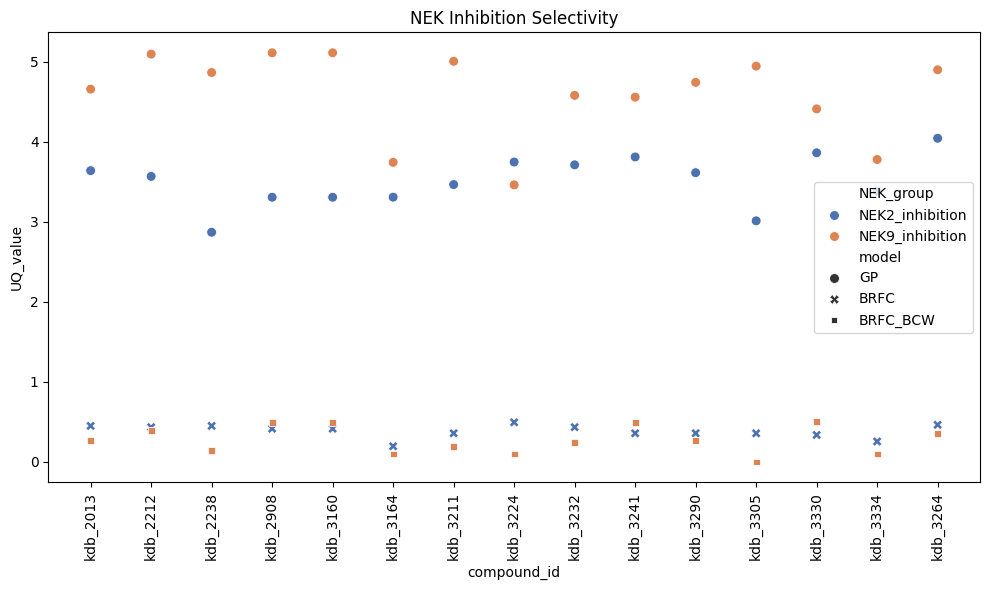

In [136]:
# fig_path='/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/UQ/compare_across/figs/UQ_point_comparison/'
df1 = pd.melt(merged_dfs[0], id_vars=['compound_id','NEK','active'],value_vars=['UQ_metric_value_GP', 'UQ_metric_value_BRFC'],
    var_name='model',value_name='UQ_value')
df1['NEK_group'] = 'NEK2_inhibition'

df2 = pd.melt(merged_dfs[1], id_vars=['compound_id','NEK','active'], value_vars=['UQ_metric_value_GP','UQ_metric_value_BRFC_BCW'],
    var_name='model',value_name='UQ_value')
df2['NEK_group'] = 'NEK9_inhibition'
all_df = pd.concat([df1, df2])
all_df['model'] = all_df['model'].str.replace('UQ_metric_value_', '')
plt.figure(figsize=(10, 6))
sns.scatterplot(data=all_df,x='compound_id',y='UQ_value',
    hue='NEK_group',style='model',palette='deep',s=50)
plt.xticks(rotation=90)
plt.title('NEK Inhibition Selectivity')
plt.tight_layout()
plt.savefig(f'inhibition_selectivity.png', bbox_inches='tight')
plt.show()


In [125]:
all_df

,compound_id,NEK,active,model,UQ_value,NEK_group
0,kdb_2013,NEK2_inhibition,0,UQ_metric_value_GP,3.641125,NEK2_inhibition
1,kdb_2212,NEK2_inhibition,0,UQ_metric_value_GP,3.569157,NEK2_inhibition
2,kdb_2238,NEK2_inhibition,0,UQ_metric_value_GP,2.871379,NEK2_inhibition
3,kdb_2908,NEK2_inhibition,0,UQ_metric_value_GP,3.308633,NEK2_inhibition
4,kdb_3160,NEK2_inhibition,0,UQ_metric_value_GP,3.308633,NEK2_inhibition
5,kdb_3164,NEK2_inhibition,0,UQ_metric_value_GP,3.309711,NEK2_inhibition
6,kdb_3211,NEK2_inhibition,0,UQ_metric_value_GP,3.467363,NEK2_inhibition
7,kdb_3224,NEK2_inhibition,0,UQ_metric_value_GP,3.748984,NEK2_inhibition
8,kdb_3232,NEK2_inhibition,0,UQ_metric_value_GP,3.713614,NEK2_inhibition
9,kdb_3241,NEK2_inhibition,0,UQ_metric_value_GP,3.812407,NEK2_inhibition


In [88]:
nek9_inhib_values = []
nek2_inhib_values=[]
for cmpd in common_inhib_test:
    for nek_df in [NEK2_inhibition, NEK9_inhibition]:
        df_list = []
        model_list=[]
        nek_val = nek_df['NEK'].iloc[0]
        # match = nek_df[nek_df['compound_id'] == cmpd]
        
        for model in ['UNDER_GP_matern', 'none_scaled_BRFC']:
            model_version = model
            model_df =pd.read_csv(f'{cmpd_df_path}{nek}_MFP_{model}_cmpd_class.csv')
            match = model_df[model_df['compound_id'] == cmpd]
            if nek_val == 'NEK9_inhibition' and model == 'none_scaled_BRFC':
                model_version = 'none_scaled_BRFC_BCW'
            row = match[match['model_version'] == model_version]
            if row.empty:
                continue

            result = {'compound_id':cmpd,'NEK': nek_val,'model': model,'model_version':model_version,
                'active':row['active'].values[0],'prediction':row['prediction'].values[0],
                'prediction_type':row['prediction_type'].values[0],
                'UQ_metric_value': row['UQ_metric_value'].values[0] }


            if nek_val == 'NEK2_inhibition':
                nek2_inhib_values.append(result)
            elif nek_val == 'NEK9_inhibition':
                nek9_inhib_values.append(result)


nek2inhib_df_final = pd.DataFrame(nek2_inhib_values)
nek9inhib_df_final = pd.DataFrame(nek9_inhib_values)
combined_df = pd.DataFrame(nek2_inhib_values+nek9_inhib_values)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [94]:
combined_df.shape

(45, 8)